In [2]:
cd ../..

/Users/nikosntampakis/Desktop/Git Hub/whitebox


In [20]:
from whitebox.sdk.whitebox import Whitebox
wb = Whitebox(host="http://127.0.0.1:8000", api_key="ca7df06f72f82f5e4bec3926209b5d12bdf168941e33531b302ae9b0c9710975")

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from plot_functions import *
import seaborn as sns

In [184]:
df_tp = load_iris()
df = pd.DataFrame(df_tp.data, columns=df_tp.feature_names)
df["target"] = df_tp.target

In [24]:
df = df.sample(frac = 1)

training_dataset=df.head(120)
inference_dataset_1=df.iloc[120:130]
inference_dataset_2=df.iloc[130:140]
inference_dataset_3=df.iloc[140:150]

In [61]:
wb.create_model(
    name="IrMod",
    type="multi_class",
    features={
        'sepal length (cm)': 'numerical',
        'sepal width (cm)': 'numerical',
        'petal length (cm)': 'numerical',
        'petal width (cm)': 'numerical'
    },
    labels={
        'Iris-Setosa': 0,
        'Iris-Versicolour': 1,
        'Iris-Virginica': 2
    },
    prediction="target",
    probability="proba"
)

{'id': '83539c2b-579f-4a2c-b7ba-02d31c9408d8',
 'created_at': '2023-02-09T14:30:13.787193',
 'updated_at': '2023-02-09T14:30:13.787193',
 'name': 'IrMod',
 'description': '',
 'type': 'multi_class',
 'features': {'sepal length (cm)': 'numerical',
  'sepal width (cm)': 'numerical',
  'petal length (cm)': 'numerical',
  'petal width (cm)': 'numerical'},
 'prediction': 'target',
 'probability': 'proba',
 'labels': {'Iris-Setosa': 0, 'Iris-Versicolour': 1, 'Iris-Virginica': 2}}

In [62]:
non_processed_df = training_dataset
processed_df = training_dataset

wb.log_training_dataset(
    model_id='83539c2b-579f-4a2c-b7ba-02d31c9408d8',
    non_processed=non_processed_df,
    processed=processed_df
)

True

In [63]:

timestamps = pd.Series(["2022-12-22"] * 10)
actuals = pd.Series([1, 1, 0, 2, 1, 1, 2, 2, 2, 1])

wb.log_inferences(
    model_id='83539c2b-579f-4a2c-b7ba-02d31c9408d8',
    non_processed=inference_dataset_1,
    processed=inference_dataset_1,
    timestamps=timestamps,
    actuals=actuals
)

True

In [64]:
timestamps = pd.Series(["2022-12-23"] * 10)
actuals = pd.Series([2, 1, 1, 1, 1, 2, 2, 2, 0, 2])

wb.log_inferences(
    model_id='83539c2b-579f-4a2c-b7ba-02d31c9408d8',
    non_processed=inference_dataset_2,
    processed=inference_dataset_2,
    timestamps=timestamps,
    actuals=actuals
)

True

In [65]:
timestamps = pd.Series(["2022-12-24"] * 10)
actuals = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

wb.log_inferences(
    model_id='83539c2b-579f-4a2c-b7ba-02d31c9408d8',
    non_processed=inference_dataset_3,
    processed=inference_dataset_3,
    timestamps=timestamps,
    actuals=actuals
)

True

In [6]:
import json

with open('descriptive.json', 'r') as openfile:
    descriptive_report = json.load(openfile)

with open('drift.json', 'r') as openfile:
    drift_report = json.load(openfile)

with open('performance.json', 'r') as openfile:
    performance_report = json.load(openfile)

# Descriptive statistics

In [98]:
#descriptive_report = wb.get_descriptive_statistics('83539c2b-579f-4a2c-b7ba-02d31c9408d8')
#descriptive_report

[{'id': '99d7c601-925b-4d58-96b3-8bca2bbdff19',
  'created_at': '2023-02-09T14:33:00.483453',
  'updated_at': '2023-02-09T14:33:00.483453',
  'model_id': '83539c2b-579f-4a2c-b7ba-02d31c9408d8',
  'timestamp': '2022-12-22T00:00:00',
  'feature_metrics': {'missing_count': {'sepal length (cm)': 0,
    'sepal width (cm)': 0,
    'petal length (cm)': 0,
    'petal width (cm)': 0,
    'target': 0},
   'non_missing_count': {'sepal length (cm)': 10,
    'sepal width (cm)': 10,
    'petal length (cm)': 10,
    'petal width (cm)': 10,
    'target': 10},
   'mean': {'sepal length (cm)': 5.679999999999999,
    'sepal width (cm)': 3.1,
    'petal length (cm)': 3.1799999999999997,
    'petal width (cm)': 0.97,
    'target': 0.7},
   'minimum': {'sepal length (cm)': 4.8,
    'sepal width (cm)': 2.5,
    'petal length (cm)': 1.4,
    'petal width (cm)': 0.1,
    'target': 0.0},
   'maximum': {'sepal length (cm)': 6.5,
    'sepal width (cm)': 3.9,
    'petal length (cm)': 5.6,
    'petal width (cm)': 2

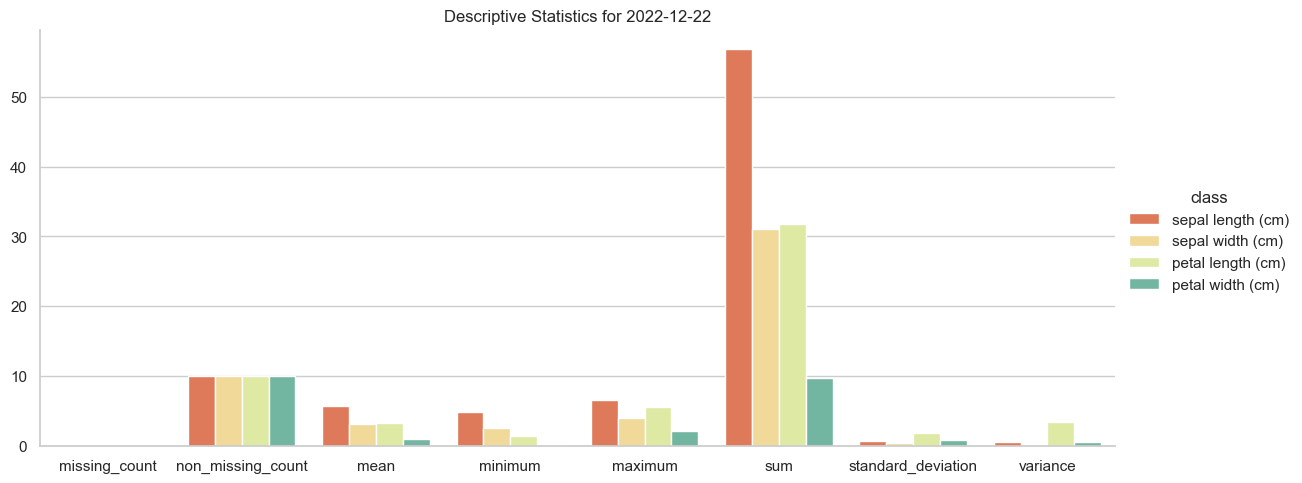

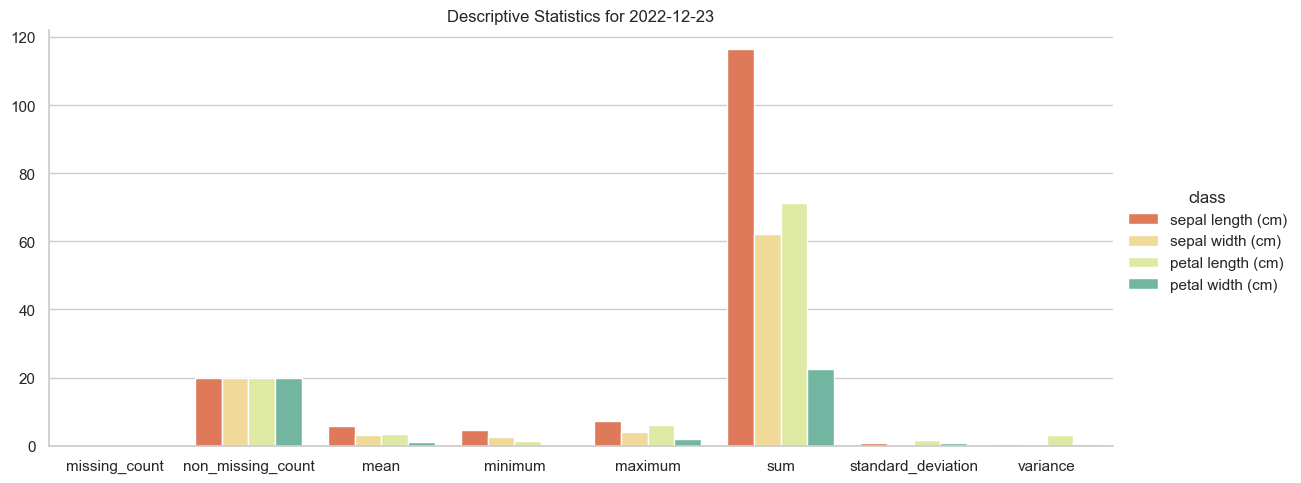

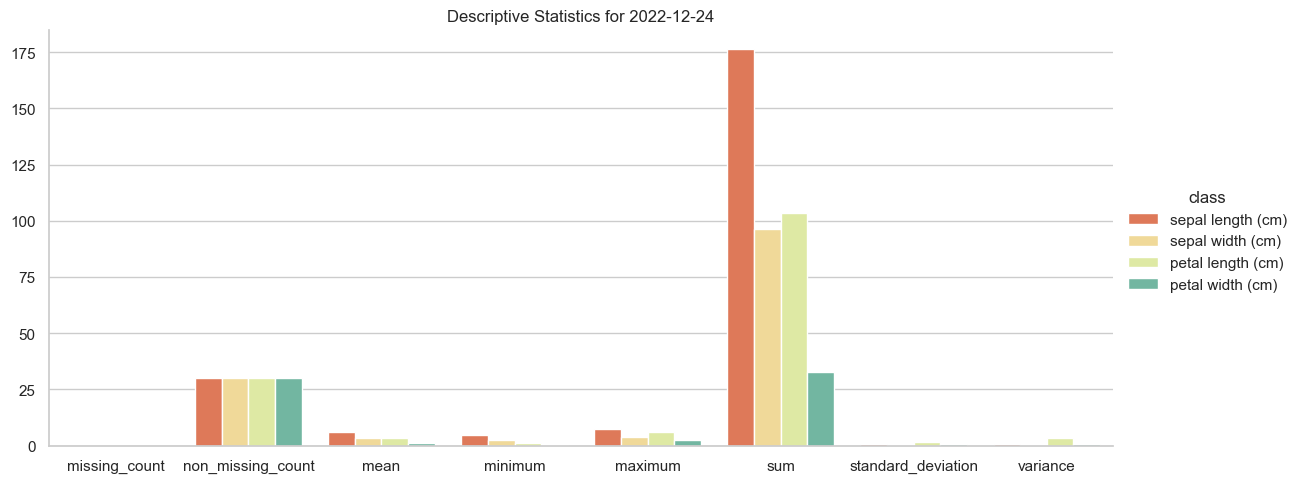

In [183]:
desriptive_statistics_plot(descriptive_report,0)
desriptive_statistics_plot(descriptive_report,1)
desriptive_statistics_plot(descriptive_report,2)

# Drifting metrics

In [185]:
#drift_report = wb.get_drifting_metrics('83539c2b-579f-4a2c-b7ba-02d31c9408d8')
#drift_report

[{'id': 'b3381df8-56b4-43f6-aa72-523427b7d723',
  'created_at': '2023-02-09T14:33:00.456240',
  'updated_at': '2023-02-09T14:33:00.456240',
  'model_id': '83539c2b-579f-4a2c-b7ba-02d31c9408d8',
  'timestamp': '2022-12-22T00:00:00',
  'concept_drift_summary': {'concept_drift_summary': {'column_name': 'target',
    'column_type': 'cat',
    'stattest_name': 'chi-square p_value',
    'drift_score': 0.3896307449384165,
    'drift_detected': False,
    'stattest_threshold': 0.05},
   'column_correlation': {'column_name': 'target',
    'current': {},
    'reference': {}}},
  'data_drift_summary': {'number_of_columns': 4,
   'number_of_drifted_columns': 0,
   'share_of_drifted_columns': 0.0,
   'dataset_drift': False,
   'drift_by_columns': {'petal length (cm)': {'column_name': 'petal length (cm)',
     'column_type': 'num',
     'stattest_name': 'K-S p_value',
     'drift_score': 0.7588302830810655,
     'drift_detected': False,
     'threshold': 0.05},
    'petal width (cm)': {'column_name'

# Performance metrics

In [186]:
#performance_report = wb.get_performance_metrics('83539c2b-579f-4a2c-b7ba-02d31c9408d8')
#performance_report

[{'id': 'b4bff1cd-76bd-47e6-8446-4ce690096dac',
  'created_at': '2023-02-09T14:33:00.473312',
  'updated_at': '2023-02-09T14:33:00.473312',
  'accuracy': 0.6,
  'precision': {'micro': 0.6,
   'macro': 0.7333333333333334,
   'weighted': 0.9199999999999999},
  'recall': {'micro': 0.6, 'macro': 0.7000000000000001, 'weighted': 0.6},
  'f1': {'micro': 0.6, 'macro': 0.5833333333333334, 'weighted': 0.675},
  'confusion_matrix': {'class0': {'true_negative': 5,
    'false_positive': 4,
    'false_negative': 0,
    'true_positive': 1},
   'class1': {'true_negative': 5,
    'false_positive': 0,
    'false_negative': 2,
    'true_positive': 3},
   'class2': {'true_negative': 6,
    'false_positive': 0,
    'false_negative': 2,
    'true_positive': 2}},
  'model_id': '83539c2b-579f-4a2c-b7ba-02d31c9408d8',
  'timestamp': '2022-12-22T00:00:00'},
 {'id': '0ffa0e1d-8e8a-4658-8443-7405a9cd6fd5',
  'created_at': '2023-02-09T14:36:00.522083',
  'updated_at': '2023-02-09T14:36:00.522083',
  'accuracy': 0.

# XAI

In [75]:
xai1 = wb.get_xai_row("5e7b7c5f-ad22-434d-97f2-5fc337e18652")
xai2 = wb.get_xai_row("1d530810-6305-47c1-94fb-2c220b75de22")
xai3 = wb.get_xai_row("eea71062-bbcc-4bf7-afd0-a74445e29fe8")

In [76]:
xai1

{'petal length (cm)': -0.3655865878574561,
 'petal width (cm)': 0.2930264801775198,
 'sepal width (cm)': -0.0613901196998769,
 'sepal length (cm)': 0.00817411441223634}

In [77]:
xai2

{'petal length (cm)': -0.36642992068168223,
 'sepal width (cm)': -0.02670817184574049,
 'petal width (cm)': 0.024446452319809565,
 'sepal length (cm)': 0.006533247074591248}

In [78]:
xai3

{'petal length (cm)': 0.2504030752277958,
 'petal width (cm)': -0.060684870258653496,
 'sepal width (cm)': -0.02022202057162284,
 'sepal length (cm)': 0.01005262567815375}

In [59]:
#wb.delete_model('f96e93bd-80fb-4b44-834d-6ffc5a737fbc')

True